# 🎓 Student Performance Prediction 
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# This project analyzes student performance data to uncover insights and build a predictive model based on features like gender, lunch type, and test preparation.

---

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

---


## 1. Importing Libraries

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Loading and Previewing the Dataset

In [130]:
df = pd.read_csv("StudentsPerformance.csv")

In [132]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Descriptive Statistics

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [137]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [139]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 4. Analyzing Categorical Variables

In [142]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [144]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [146]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [148]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [150]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

## 5. Visualizing Score Distributions and Relationships

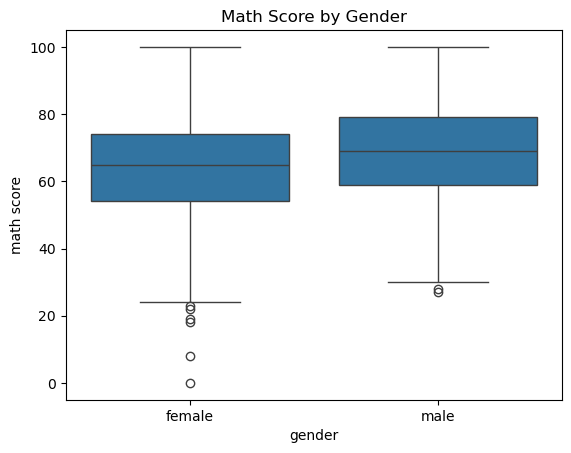

In [153]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')
plt.show()

## 📊 5.1 Math Score by Gender

### This boxplot compares the distribution of math scores between male and female students.

### - Male students tend to have a slightly higher median math score.
### - Female students have more outliers on the lower end.
### - The spread of scores is wider for females, suggesting more variability.


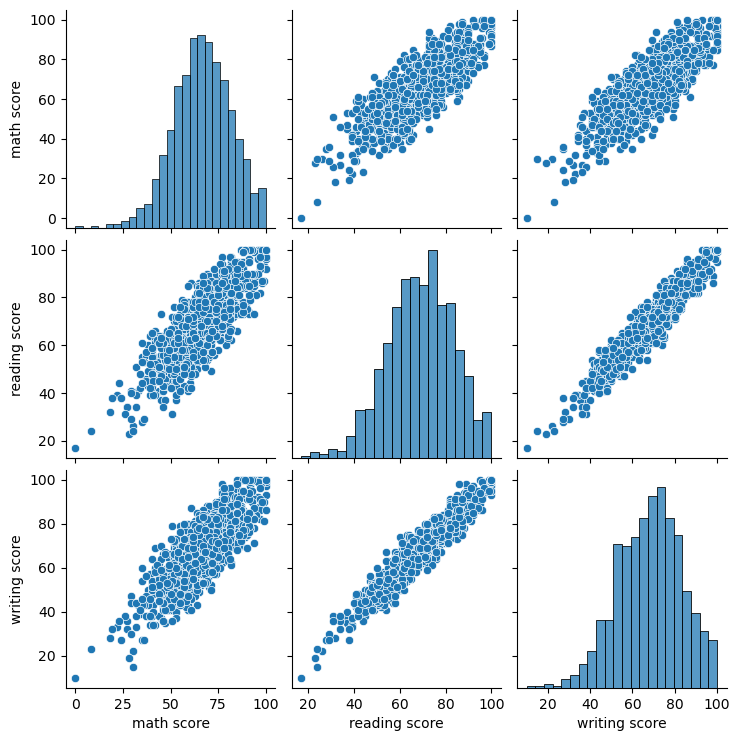

In [156]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

## 🔗 5.2 Relationships Between Math, Reading, and Writing Scores

### This pairplot visualizes the relationships between the three core subjects.

### - All three scores are positively correlated.
### - Students who perform well in one subject tend to perform well in the others.
### - The strongest visual correlation appears between reading and writing scores.

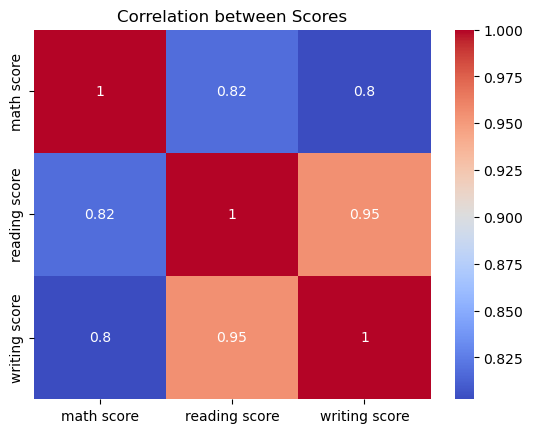

In [158]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Scores')
plt.show()

## 🔥 5.3 Correlation Heatmap

### This heatmap shows the Pearson correlation coefficients between math, reading, and writing scores.

### - High correlation between reading and writing (~0.95).
### - Moderate to strong correlation between math and the other two.


## 6. Creating and Analyzing the Average Score

In [161]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

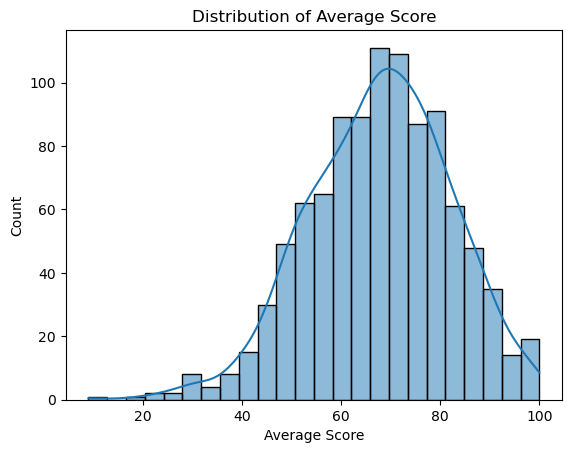

In [163]:
sns.histplot(df['average_score'], kde=True)
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

## 📈 6.1 Distribution of Average Score

### This histogram shows how average scores (across math, reading, and writing) are distributed.

### - The distribution is slightly skewed to the left.
### - Most students score between 60 and 80 on average.


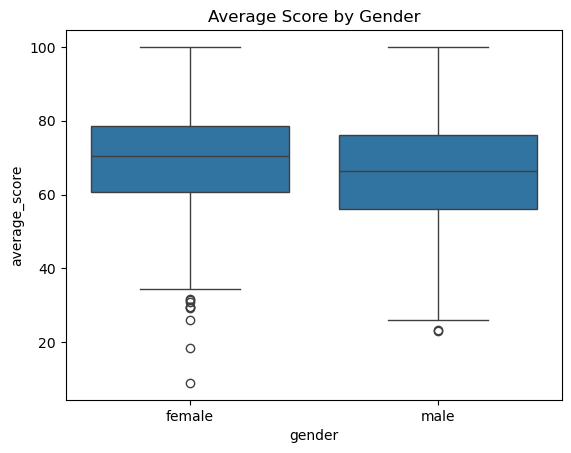

In [168]:
sns.boxplot(x='gender', y='average_score', data=df)
plt.title('Average Score by Gender')
plt.show()

## ⚖️ 6.2 Average Score by Gender

### This boxplot compares the average score (math + reading + writing / 3) between male and female students.

### - Female students have a slightly higher median average score.
### - Both groups have similar score ranges overall.
### - However, more extreme low-performing outliers are observed among female students.

---

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

---


## 🧠 7. Linear Regression Model

### In this section, we apply a **Linear Regression** model to predict students' **writing scores** based on their **math** and **reading scores**.

### Why Linear Regression?
### Linear Regression is a simple yet powerful algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that the relationship between variables is linear.

### Model Goal:
### - **Input (X):** Math Score, Reading Score  
### - **Output (y):** Writing Score  
### - **Objective:** Learn the best-fit line that minimizes the prediction error using **Mean Squared Error** (MSE).


In [183]:
# Select features
X = df[['math score', 'reading score']]

# Define target
y = df['writing score']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 23.66524333639131
R² Score: 0.9018108855760416


In [185]:
# View model parameters
print("Intercept (theta_0):", model.intercept_)
print("Coefficients (theta_1...n):", model.coef_)

Intercept (theta_0): 68.06570954648402
Coefficients (theta_1...n): [ 1.06681575 13.68078068]


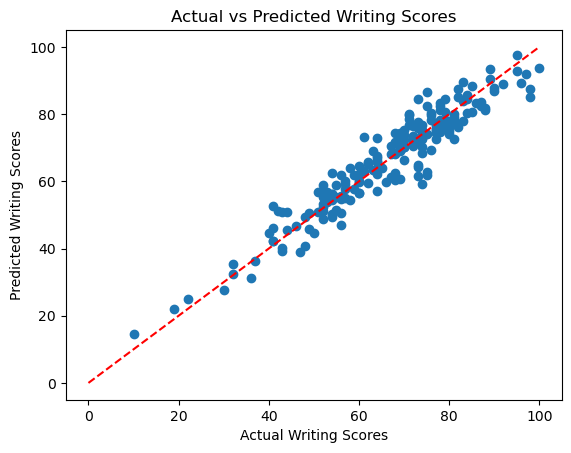

In [194]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Writing Scores")
plt.ylabel("Predicted Writing Scores")
plt.title("Actual vs Predicted Writing Scores")
plt.plot([0, 100], [0, 100], 'r--') 
plt.show()


## 📈 Actual vs Predicted Writing Scores

### This scatter plot shows the relationship between the actual writing scores and the predicted scores from the linear regression model.  
### Each dot represents a student.  
### - If the model prediction was perfect, all points would lie exactly on the red dashed line (y = x).  
### - The closer the points are to that line, the better the model's performance.  
### - This visual check helps us understand how accurate the predictions are.


---

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

---


## 🧠 8. Logistic Regression Model

### In this section, we apply a **Logistic Regression** model to predict whether a student **passed** based on their **math score, reading score, gender, lunch, and test preparation course**.

### ---

### Why Logistic Regression?

### Logistic Regression is a simple yet effective classification algorithm that models the **probability** of a binary outcome (e.g., pass/fail). It is used when the target variable is categorical.

### ---

### Model Goal:

### - **Input (X):**  
  ### Math Score, Reading Score, Gender, Lunch, Test Preparation Course

### - **Output (y):**  
  ### Passed (1 = passed, 0 = failed)

### - **Objective:**  
  ### Learn a decision boundary that can classify students as "passed" or "failed" using **maximum likelihood estimation**.

### ---

#### Result Example:

### - Accuracy: **0.98**  
### - Precision, Recall, and F1-Score indicate that the model performs very well on both classes (pass/fail).



In [213]:
# Create the target variable "passed"
df['passed'] = (df['average_score'] >= 60).astype(int)

# Select features and encode them
X = df[['math score', 'reading score', 'gender', 'lunch', 'test preparation course']]
X = pd.get_dummies(X, drop_first=True)

# Define the target variable
y = df['passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98

Confusion Matrix:
 [[ 60   2]
 [  2 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.99      0.99      0.99       138

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



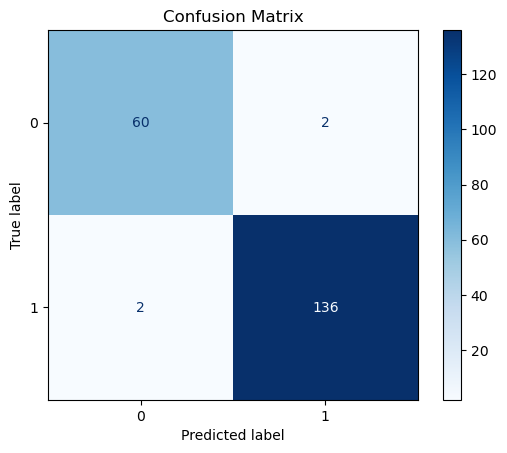

In [216]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 🔷 8.1 Confusion Matrix Interpretation

### The confusion matrix shows how well the classification model performs:

### - **True Positives (TP): 136** — correctly predicted as class 1.
### - **True Negatives (TN): 60** — correctly predicted as class 0.
### - **False Positives (FP): 2** — predicted as class 1, but actually class 0.
### - **False Negatives (FN): 2** — predicted as class 0, but actually class 1.

### The model demonstrates **high accuracy** with only 4 misclassifications out of 200 samples.